In [ ]:
import pandas as pd

In [ ]:
temps_df = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')

In [ ]:
temps_df.shape

(51406, 7)

In [ ]:
temps_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
temps_df.AverageTemperature.describe()

count    49546.000000
mean        13.596416
std         11.300839
min        -31.138000
25%          5.978000
50%         14.054000
75%         24.016000
max         38.531000
Name: AverageTemperature, dtype: float64

In [ ]:
temps_df[pd.isnull(temps_df.AverageTemperature)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
50522,1869-09-01,NaN,NaN,Abohar,India,29.74N,73.85E
50523,1869-10-01,NaN,NaN,Abohar,India,29.74N,73.85E
50524,1869-11-01,NaN,NaN,Abohar,India,29.74N,73.85E
50525,1869-12-01,NaN,NaN,Abohar,India,29.74N,73.85E


In [ ]:
temps_clean_df = temps_df.dropna()

In [ ]:
temps_clean_df[pd.isnull(temps_clean_df.AverageTemperature)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude


In [ ]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: >

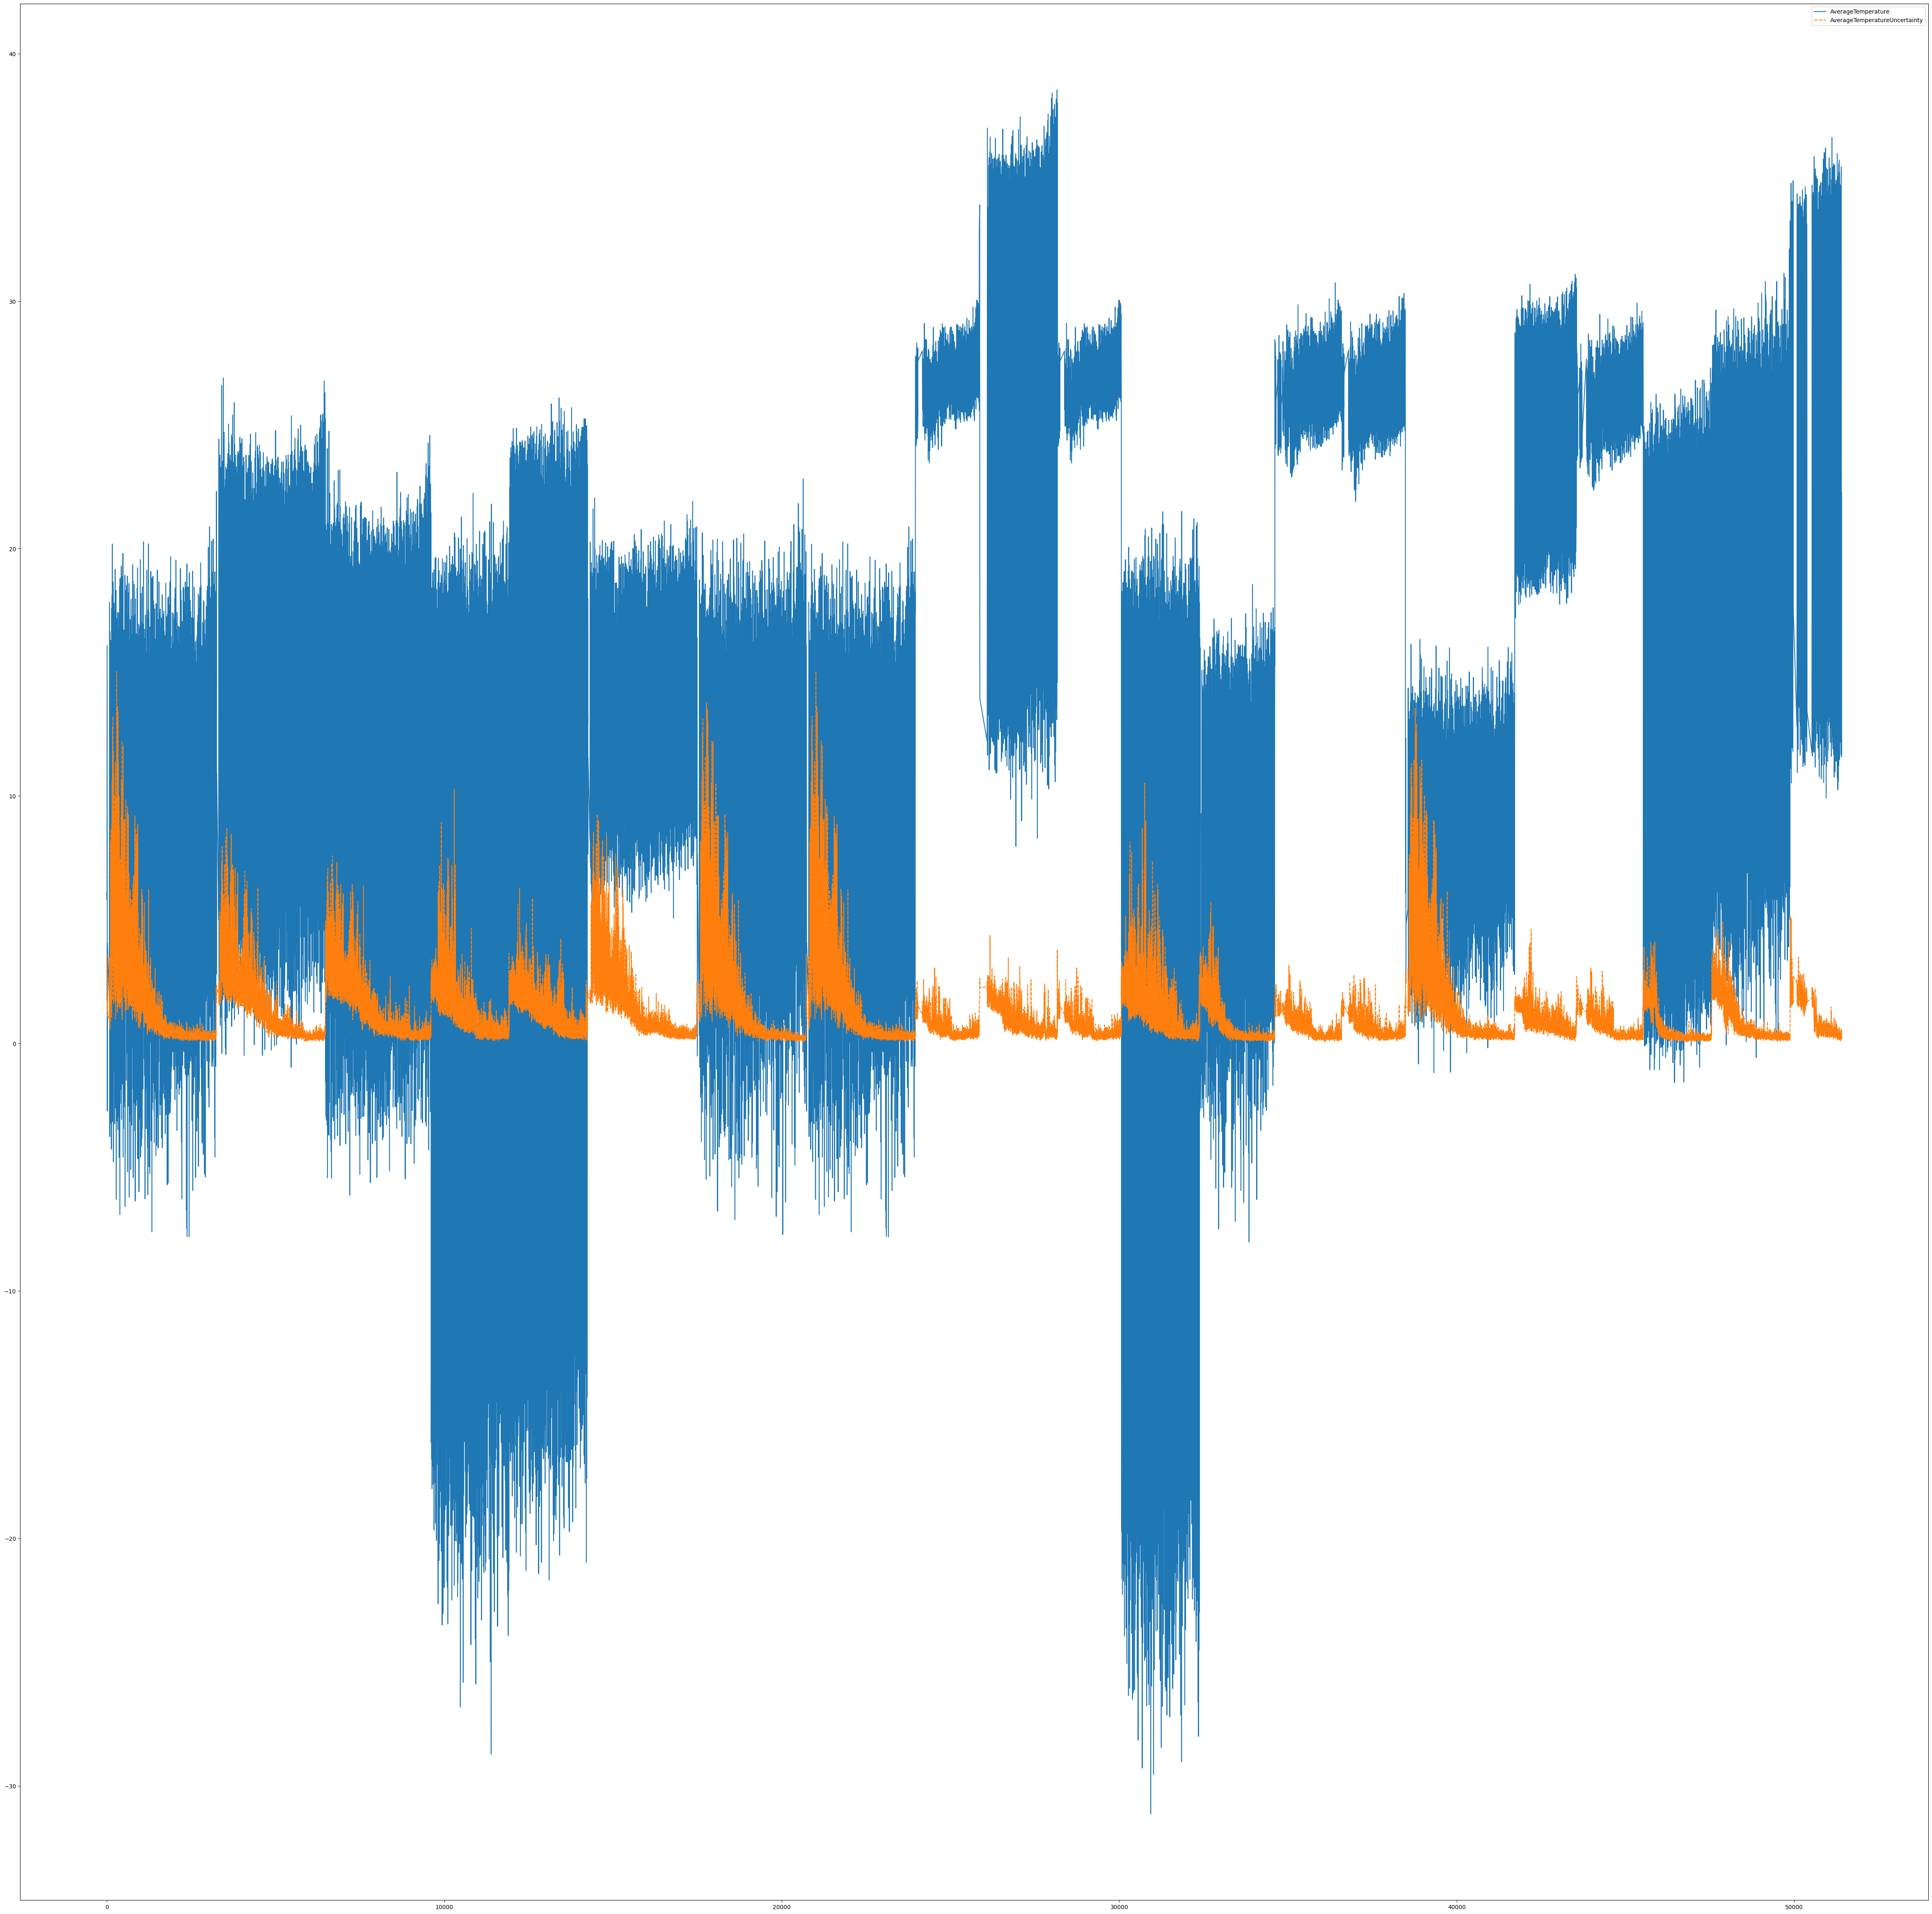

In [ ]:
plt.figure(figsize=(60,60))
sns.lineplot(data=temps_clean_df)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
temps_clean_df = temps_clean_df.copy()
temps_clean_df['dt'] = pd.to_datetime(temps_clean_df['dt'])
temps_clean_df['Year'] = temps_clean_df['dt'].dt.year

In [ ]:
X = temps_clean_df[['Year']]
y = temps_clean_df['AverageTemperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
last_year = temps_clean_df['Year'].max()
years_ahead = [last_year + 50, last_year + 100, last_year + 200, last_year + 500]
future_years = pd.DataFrame({'Year': years_ahead})

predicted_temperatures = model.predict(future_years)

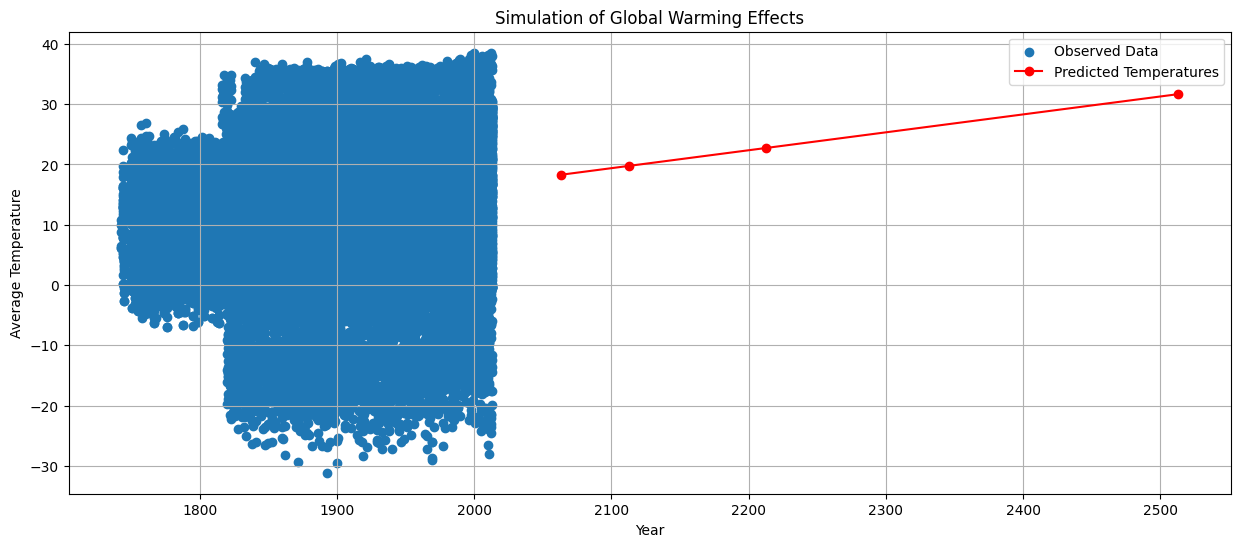

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(temps_clean_df['Year'], temps_clean_df['AverageTemperature'], label='Observed Data')
plt.plot(future_years['Year'], predicted_temperatures, 'ro-', label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)

Mean Squared Error: 124.90907677912433
Root Mean Squared Error: 11.176272937751849
Mean Absolute Error: 9.024784492291708
R-squared score: 0.029514913022222533


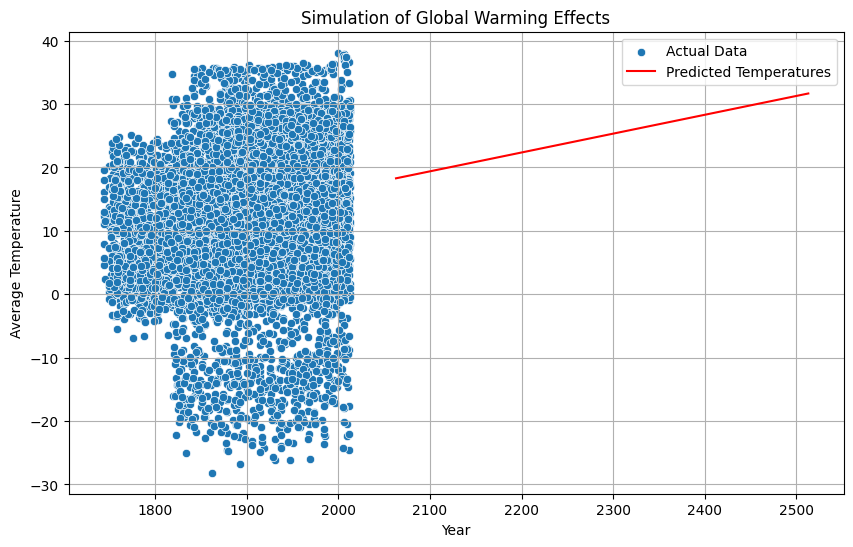

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Year'], y=y_test, label='Actual Data')
sns.lineplot(x=future_years['Year'], y=predicted_temperatures, color='red', label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
param_grid = {
    'alpha': [0.87, 0.095, 0.0117],
    'l1_ratio': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(ElasticNet(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

Best alpha: 0.0117
Best l1_ratio: 1.0


In [ ]:
model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=1000)
model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.0117, l1_ratio=1.0)

In [ ]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 124.9081004996003
R-squared score: 0.029522498257365082


In [ ]:
future_years = pd.DataFrame({'Year': np.arange(1750, 3000, 50)})
future_years_scaled = scaler.transform(future_years)
predicted_temperatures = model.predict(future_years_scaled)

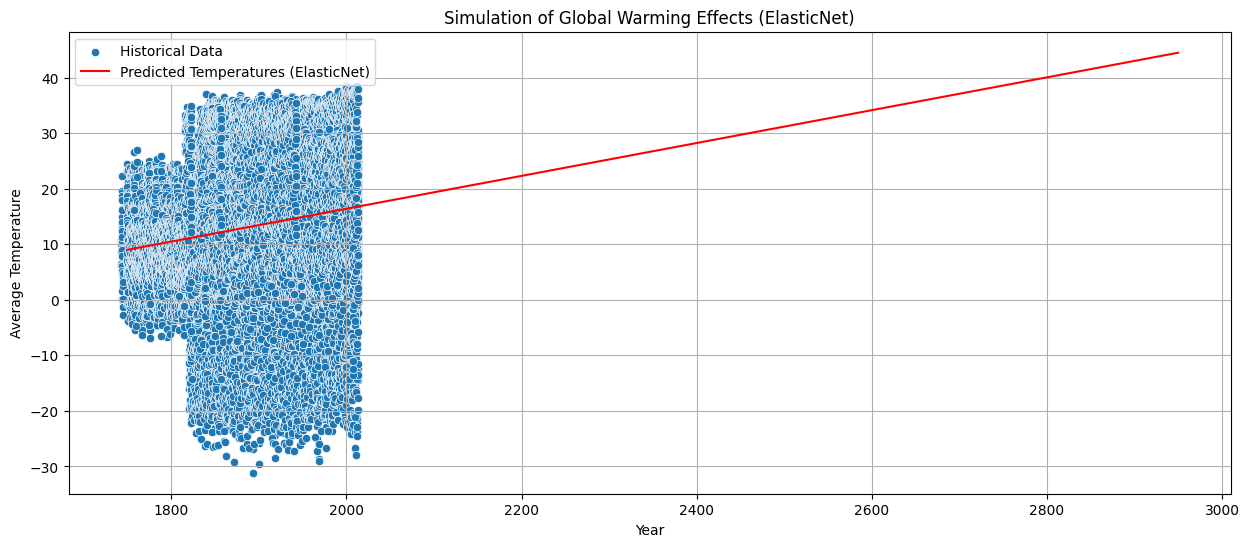

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=X['Year'], y=y, label='Historical Data')
sns.lineplot(x=future_years['Year'], y=predicted_temperatures, color='red', label='Predicted Temperatures (ElasticNet)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects (ElasticNet)')
plt.legend()
plt.grid(True)
plt.show()